<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description-and-content-of-the-dataset" data-toc-modified-id="Project-description-and-content-of-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description and content of the dataset</a></span></li><li><span><a href="#Basic-descriptives" data-toc-modified-id="Basic-descriptives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic descriptives</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Cleaning-data" data-toc-modified-id="Cleaning-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning data</a></span></li><li><span><a href="#Optimizing-memory-usage" data-toc-modified-id="Optimizing-memory-usage-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Optimizing memory usage</a></span></li><li><span><a href="#Splitting-the-data-into-train-and-test-datasets" data-toc-modified-id="Splitting-the-data-into-train-and-test-datasets-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Splitting the data into train and test datasets</a></span></li><li><span><a href="#Some-visualization-of-train-data" data-toc-modified-id="Some-visualization-of-train-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Some visualization of train data</a></span></li></ul></li><li><span><a href="#Exploring-Time-Series" data-toc-modified-id="Exploring-Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring Time Series</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Decomposition" data-toc-modified-id="Time-Series-Decomposition-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Time Series Decomposition</a></span></li><li><span><a href="#KPSS-Test" data-toc-modified-id="KPSS-Test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>KPSS Test</a></span></li><li><span><a href="#ADF-Test" data-toc-modified-id="ADF-Test-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ADF Test</a></span></li><li><span><a href="#Additional-prove-of-a-neccessity-of-differencing" data-toc-modified-id="Additional-prove-of-a-neccessity-of-differencing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Additional prove of a neccessity of differencing</a></span></li></ul></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ARIMA</a></span><ul class="toc-item"><li><span><a href="#The-concept" data-toc-modified-id="The-concept-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The concept</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Rolling-forecast" data-toc-modified-id="Rolling-forecast-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Rolling forecast</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#The-concept" data-toc-modified-id="The-concept-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The concept</a></span></li><li><span><a href="#Transforming-data" data-toc-modified-id="Transforming-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Transforming data</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Rolling-forecast" data-toc-modified-id="Rolling-forecast-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Rolling forecast</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Comparison-of-performance-of-ARIMA-and-XGBoost" data-toc-modified-id="Comparison-of-performance-of-ARIMA-and-XGBoost-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Comparison of performance of ARIMA and XGBoost</a></span></li><li><span><a href="#Limitations-and-possible-further-steps" data-toc-modified-id="Limitations-and-possible-further-steps-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Limitations and possible further steps</a></span></li></ul></li></ul></div>

## Project description and content of the dataset

In this test task, I am building a sales' forecast. The dataset has been taken from https://www.kaggle.com/maxinstellar/forecasting-task - thank you, Maxim Tingaev.

There are historical sales' data for 2 full years, as well as for the 1st quarter of 2020. The dataset shows sales for two brands of cosmetic and care products across three stores.

The author offers 4 files:

- sales_train - sales for the period from 2018.01.01 to 2020.02.29,
- Items - this table contains common information on brands,
- stock - this file contains count of days with zero balance for items,
- test_submission - a sample of what the final file should look like.

I will ignore the files "stock" (it has no meaning for my analysis) and "test_submission" (I will rather create a separate file for January and February, 2020 from the "sales_train").

The original task was to build a forecast just for one month; in order to make it more interesting and insightful, I will do a forecast for two months with weekly steps, in other words, predicting sales for each week of a period of two months - in total 9 weeks in January and February 2020.

Data from 2018.01.01 to 2020.12.31 from "sales_train.xlsx" will be used as the train dataset, data for January and February, 2020 will be used to create the test dataset.

Description of the variables in "sales_train.xlsx":

- date: day of sale
- Month: month
- Year: year
- date_block_num: sequential number of the month
- week: sequential number of the week
- shop_id: store code
- item_id: product code
- brand_id: brand code
- item_cnt_day: number of sales in pieces
- item_price: item price
- discamount: amount of the discount
- promo: promo - yes or no
- size_disc: discount in %% of the item price
- promo_time: promo time in days (?)
- spec_promo: a special promo - yes or no

## Basic descriptives

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
items = pd.read_csv('items.csv', encoding = 'cp1251', delimiter=';')

In [3]:
items.tail(3)

,item_id,brand_id,item_category_id,item_category
1364,20225856009,10013,444,Макияж
1365,35852544101,10013,444,Макияж
1366,20225856020,10013,444,Макияж


In [4]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 4 columns):
item_id             1367 non-null object
brand_id            1367 non-null int64
item_category_id    1367 non-null int64
item_category       1367 non-null object
dtypes: int64(2), object(2)
memory usage: 42.8+ KB


No missing values here.

In [5]:
# Describing variables in "items"
for c in items.columns:
    print(f"{c}\n{items[c].value_counts()}\n****************************")

item_id
20220928001    1
16925552002    1
15828736032    1
7856240003     1
15817424031    1
              ..
15801072024    1
20221712015    1
16925216011    1
17024112029    1
15828736001    1
Name: item_id, Length: 1367, dtype: int64
****************************
brand_id
10013    705
10021    662
Name: brand_id, dtype: int64
****************************
item_category_id
444    927
555    372
333     64
666      4
Name: item_category_id, dtype: int64
****************************
item_category
Макияж              927
Уход                372
Парфюмерия           64
Уход за волосами      4
Name: item_category, dtype: int64
****************************


In [6]:
items['item_id'].nunique()

1367

There are only two brands,<br>
encompassing 1367 unique items, <br>
which belong to four categories of a very different size: Makeup, Care, Perfumery, and Hair care.

In [7]:
# Creating a column with English category names
items['item_category_en'] = items['item_category']
di = {'Макияж':'Makeup', 'Уход':'Care', 'Парфюмерия':'Perfumery', 'Уход за волосами':'Hair care'}
items['item_category_en'] = items['item_category_en'].map(di)

In [8]:
sales = pd.read_excel('sales_train.xlsx')

In [9]:
sales.tail(3)

,date,Month,Year,date_block_num,week,shop_id,item_id,brand_id,item_cnt_day,item_price,discamount,promo,size_disc,promo_time,spec_promo
99811,2020-03-31,3,2020,26,120,111,16923312064,10021,0,325,163,1,50,6,0
99812,2020-03-31,3,2020,26,120,111,16925552013,10021,0,210,105,1,50,6,0
99813,2020-03-31,3,2020,26,120,111,15815856008,10021,0,365,183,1,50,6,0


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99814 entries, 0 to 99813
Data columns (total 15 columns):
date              99814 non-null datetime64[ns]
Month             99814 non-null int64
Year              99814 non-null int64
date_block_num    99814 non-null int64
week              99814 non-null int64
shop_id           99814 non-null int64
item_id           99814 non-null int64
brand_id          99814 non-null int64
item_cnt_day      99814 non-null int64
item_price        99814 non-null int64
discamount        99814 non-null int64
promo             99814 non-null int64
size_disc         99814 non-null int64
promo_time        99814 non-null int64
spec_promo        99814 non-null int64
dtypes: datetime64[ns](1), int64(14)
memory usage: 11.4 MB


In [11]:
sales['date'].min(), sales['date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-03-31 00:00:00'))

No missing values are visible. "date" is already in datetime-format. 

In [12]:
# But first, rename some columns
sales.rename(columns={'Month': 'month', 'Year': 'year', 'date_block_num': 'month_num', 'week': 'week_num', 'item_cnt_day': 'items_sold'}, inplace=True)

In [13]:
# Describing categorical variables in "sales"
cat = ['shop_id', 'brand_id', 'promo', 'size_disc', 'promo_time', 'spec_promo']

for c in sales[cat]:
    print(f"{c}\n{sales[c].value_counts()}\n****************************")

shop_id
111    39314
110    31233
128    29267
Name: shop_id, dtype: int64
****************************
brand_id
10021    59140
10013    40674
Name: brand_id, dtype: int64
****************************
promo
0    55974
1    43840
Name: promo, dtype: int64
****************************
size_disc
0     55974
50    24197
40    15867
35     2353
45      880
30      543
Name: size_disc, dtype: int64
****************************
promo_time
0     56130
3      8304
1      5877
2      5099
27     4909
25     4890
6      4378
29     3867
9      1607
4      1359
10     1175
7      1152
5      1067
Name: promo_time, dtype: int64
****************************
spec_promo
0    92941
1     6873
Name: spec_promo, dtype: int64
****************************


In [14]:
numerical = sales[['month', 'year', 'month_num', 'week_num', 'items_sold', 'item_price', 'discamount']]
numerical.describe()

,month,year,month_num,week_num,items_sold,item_price,discamount
count,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000,99814.000000
mean,6.308584,2018.726251,14.023594,64.233334,1.054712,404.842808,88.029315
std,3.694841,0.665695,7.482713,33.141317,0.534787,257.717373,131.061558
min,1.000000,2018.000000,0.000000,1.000000,-4.000000,0.000000,-723.000000
25%,3.000000,2018.000000,8.000000,38.000000,1.000000,253.000000,0.000000
50%,6.000000,2019.000000,14.000000,64.000000,1.000000,336.000000,0.000000
75%,10.000000,2019.000000,21.000000,93.000000,1.000000,491.000000,150.000000
max,12.000000,2020.000000,26.000000,120.000000,22.000000,3681.000000,1841.000000


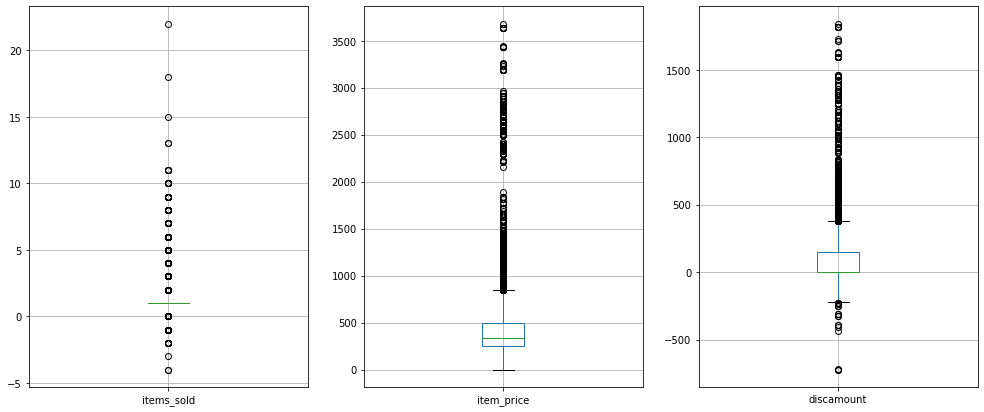

In [15]:
fig, axes = plt.subplots(1, 3)
df = sales[['items_sold', 'item_price', 'discamount']]

for i, el in enumerate(list(df.columns.values)):
    a = df.boxplot(el, ax=axes.flatten()[i])

fig.set_size_inches(17, 7)
plt.show()

Negative values for "items_sold" and "discamount" are suspicious, "item_price" = 0 is hard to interpret. However, for my analysis only "items_sold" will be needed, so I'll deal with it now.

## Data preprocessing

### Cleaning data

In [16]:
# Adding week number
sales['week'] = sales['date'].dt.strftime('%U')

In [17]:
sales.loc[(sales['year'] == 2018) & (sales['week'] == '52'), 'week'] = '00'
sales.loc[(sales['year'] == 2019) & (sales['week'] == '52'), 'week'] = '00'

In [18]:
negsales = sales.loc[sales['items_sold'] < 0]

In [19]:
len(negsales)

225

In [20]:
negsales.loc[:, 'items_sold'].value_counts() 

-1    211
-2     11
-4      2
-3      1
Name: items_sold, dtype: int64

There are 225 cases where 'items_sold' (number of sales in pieces on a particlar day) is coded with numbers below zero which I cannot interpret without additional background information. Such cases will be treated as missings and deleted, in order to avoid missing values in the dependent variable.

In [21]:
# Dropping rows
sales = sales.loc[sales['items_sold'] >= 0]

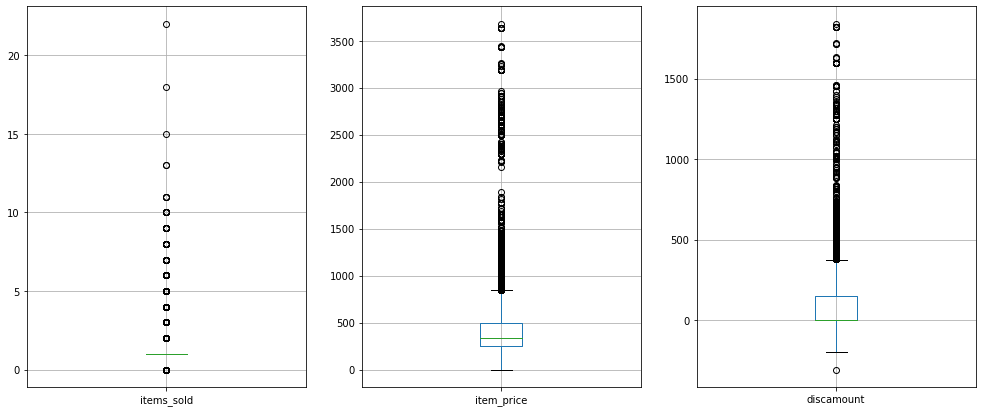

In [22]:
fig, axes = plt.subplots(1, 3)
df = sales[['items_sold', 
           'item_price', 
           'discamount'
           ]]

for i, el in enumerate(list(df.columns.values)):
    a = df.boxplot(el, ax=axes.flatten()[i])

fig.set_size_inches(17, 7)
plt.show()

In [23]:
# Re-creating the variable 'week_num' (ex-'week', "sequential number of the week") with correct coding.
sales['week_number'] = np.NaN
sales.loc[(sales['week_num'] < 53), 'week_number'] = sales['week_num']
sales.loc[(sales['week_num'] >= 53) & (sales['week_num'] < 106), 'week_number'] = sales['week_num']-1
sales.loc[(sales['week_num'] >= 106), 'week_number'] = sales['week_num']-2

sales = sales.drop('week_num', 1)
sales = sales.rename(columns={'week_number': 'week_num'})

### Optimizing memory usage

In [24]:
# Items: Re-formatting some columns to "category"
cat = ['brand_id', 'item_category_id', 'item_category', 'item_category_en']
for c in items[cat]:
    items[c] = items[c].astype('category')

In [25]:
# Sales: Re-formatting some columns to "category"
cat = ['shop_id', 'brand_id', 'promo', 'spec_promo']
for c in sales[cat]:
    sales[c] = sales[c].astype('category')

In [26]:
items['item_id'] = items['item_id'].astype(str)
sales['item_id'] = sales['item_id'].astype(str)

### Splitting the data into train and test datasets

The test dataset should contain records from January and February, 2020. Therefore the split will be very straightforward: records from January and February, 2020 (weeks 105 - 113) will be just separated from all earlier ones.

In [27]:
train_data = sales.loc[sales['week_num'] < 105]
test_data = sales.loc[sales['week_num'].between(105, 113)]

### Some visualization of train data

Text(0, 0.5, 'Average sales')

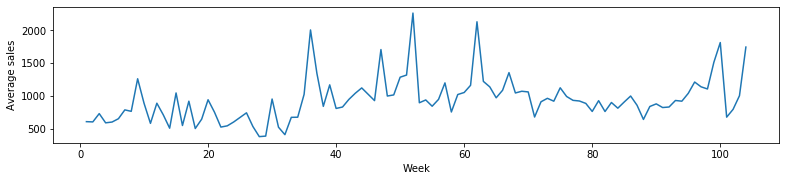

In [28]:
df = train_data.groupby(['week_num']).agg({'items_sold':'sum'})#.reset_index()
plt.figure(figsize=(13, 2.5))
sns.lineplot(x='week_num', y='items_sold', data=df)
plt.xlabel("Week")
plt.ylabel("Average sales")

Text(0, 0.5, 'Average sales')

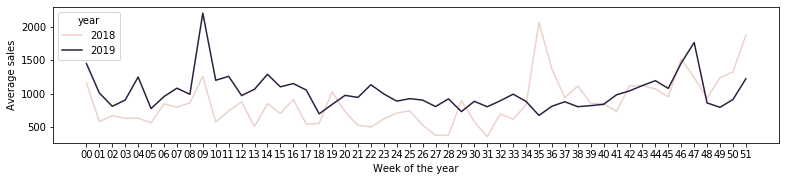

In [29]:
df = train_data.groupby(['year', 'week']).agg({'items_sold':'sum'}).reset_index()
plt.figure(figsize=(13, 2.5))
sns.lineplot(x='week', y='items_sold', hue='year', data=df)
plt.xlabel("Week of the year")
plt.ylabel("Average sales")

* Weeks 9 and 62: The International Women's Day.
* Week 35: The first week of September 2018 - quite a large peak which is however absent in 2019, week 88. Sales in 2018 could be boosted by the so called first school week when families are back from holidays - however, it's unclear why this did not repeat one year later.
* Weeks 46 and 100 - no explanation why these weeks in November generated so many sales; some promotional activity undertaken by the company?
* Weeks 51 and 104 - New Year's eve.

Text(0, 0.5, 'Average sales')

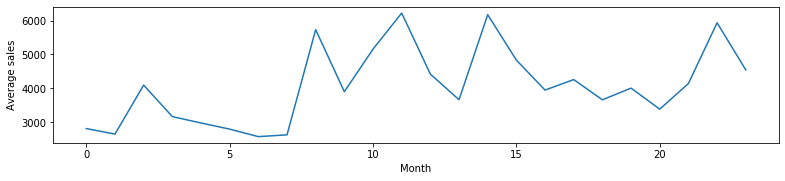

In [30]:
df = train_data.groupby(['month_num']).agg({'items_sold':'sum'})
plt.figure(figsize=(13, 2.5))
sns.lineplot(x='month_num', y='items_sold', data=df)
plt.xlabel("Month")
plt.ylabel("Average sales")

Text(0, 0.5, 'Aver. sales')

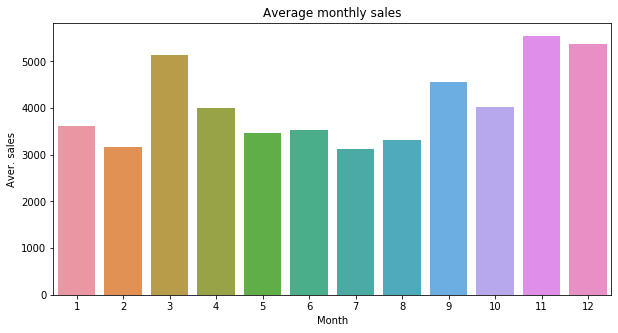

In [31]:
months_sum = train_data.groupby(['year', 'month']).agg({'items_sold':'sum'}).reset_index()
month_sum_av = months_sum.groupby('month').agg({'items_sold':'mean'}).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='items_sold', data=month_sum_av)
plt.title("Average monthly sales")
plt.xlabel("Month")
plt.ylabel("Aver. sales")

Text(0, 0.5, 'Average sales')

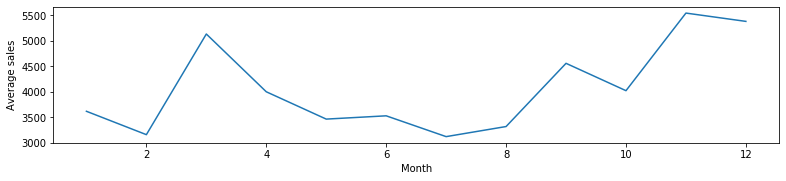

In [32]:
df = train_data.groupby(['year', 'month']).agg({'items_sold':'sum'}).reset_index()
df2 = df.groupby(['month']).agg({'items_sold':'mean'}).reset_index()
plt.figure(figsize=(13, 2.5))
sns.lineplot(x='month', y='items_sold', data=df2)
plt.xlabel("Month")
plt.ylabel("Average sales")

Text(0, 0.5, 'Average sales')

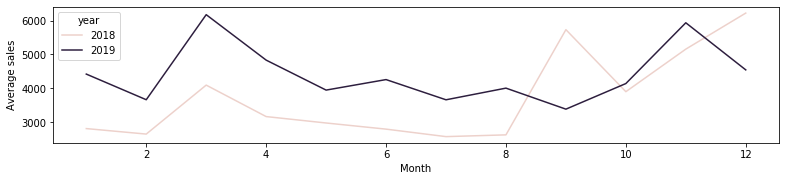

In [33]:
df = train_data.groupby(['year', 'month']).agg({'items_sold':'sum'}).reset_index()
plt.figure(figsize=(13, 2.5))
sns.lineplot(x='month', y='items_sold', hue='year', data=df)
plt.xlabel("Month")
plt.ylabel("Average sales")

The overall level of sales was higher in 2019 than in 2018 from January till August and the pattern was similar: some decrease in February, lots of sales in March and a slow downward movement from April till August. However, two months were very different in 2018 and 2019: September 2018 - lots of sales which was not observed in 2019; December 2018 - continuation of growth from November, absent in 2019 when sales returned to more or less the October level. This can be an argument against seasonality - its presence is dubious if we take data for the span of only two years.

In [34]:
# Adding category labels from the dataset "items"
train_data = pd.merge(train_data, items[['item_id', 'item_category_id', 'item_category_en']], on='item_id', how='left')

In [35]:
train_data.head(3)

,date,month,year,month_num,shop_id,item_id,brand_id,items_sold,item_price,discamount,promo,size_disc,promo_time,spec_promo,week,week_num,item_category_id,item_category_en
0,2018-01-01,1,2018,0,111,35852544067,10013,1,265,0,0,0,0,0,00,1.0,444,Makeup
1,2018-01-01,1,2018,0,111,15793344028,10021,1,228,0,0,0,0,0,00,1.0,444,Makeup
2,2018-01-01,1,2018,0,111,8221024002,10021,1,425,0,0,0,0,0,00,1.0,333,Perfumery


In [36]:
train_data['item_category_en'].unique()

[Makeup, Perfumery, Care, Hair care]
Categories (4, object): [Makeup, Perfumery, Care, Hair care]

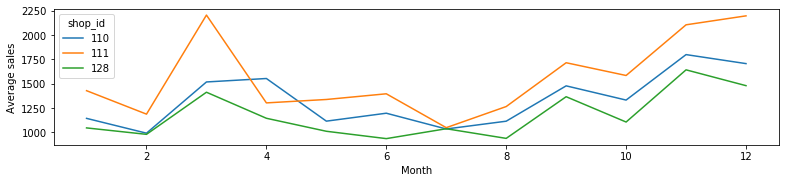

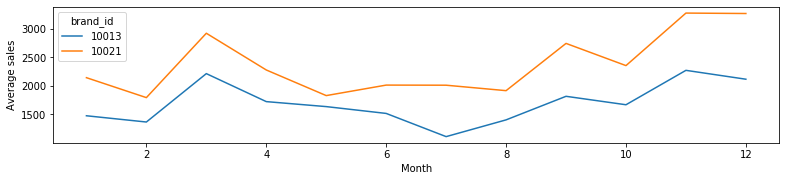

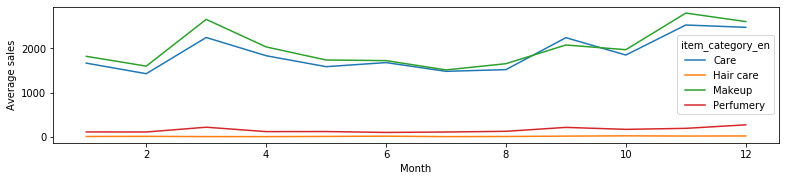

In [37]:
for i in ['shop_id', 'brand_id', 'item_category_en']:

    df = train_data.groupby([i, 'year', 'month']).agg({'items_sold':'sum'}).reset_index()
    df2 = df.groupby([i, 'month']).agg({'items_sold':'mean'}).reset_index()
    plt.figure(figsize=(13, 2.5))
    sns.lineplot(x='month', y='items_sold', hue=i, data=df2)
    plt.xlabel("Month")
    plt.ylabel("Average sales")

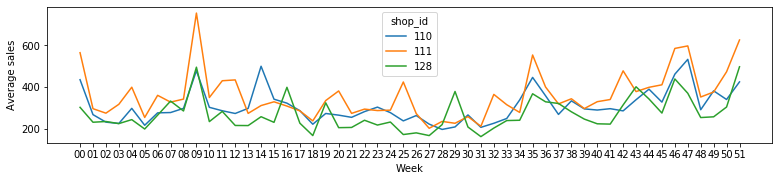

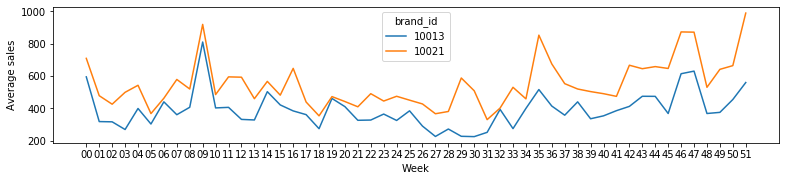

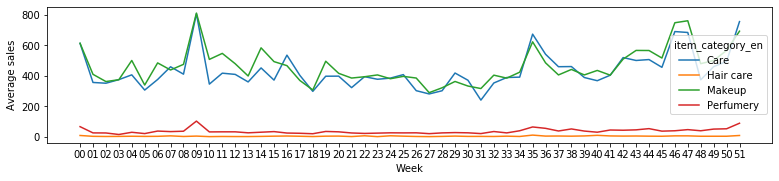

In [38]:
for i in ['shop_id', 'brand_id', 'item_category_en']:

    df = train_data.groupby([i, 'year', 'week']).agg({'items_sold':'sum'}).reset_index()
    df2 = df.groupby([i, 'week']).agg({'items_sold':'mean'}).reset_index()
    plt.figure(figsize=(13, 2.5))
    sns.lineplot(x='week', y='items_sold', hue=i, data=df2)
    plt.xlabel("Week")
    plt.ylabel("Average sales")

## Exploring Time Series

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [40]:
df = train_data.groupby(['week_num']).agg({'items_sold':'sum'})

### Time Series Decomposition

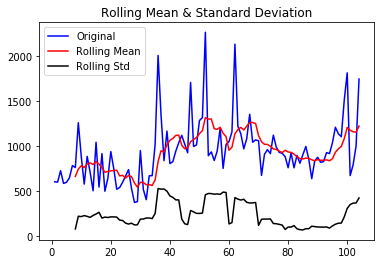

In [41]:
#Determine rolling statistics
rolmean = df.rolling(window=8).mean()
rolstd = df.rolling(window=8).std()

#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Based on graphs in the previous section, I did not observe any trend. I would also say that there is no evidence of seasonality because a) peaks in sales are rather attributed to single weeks and not always the same weeks in 2018 and 2019 and b) only 2 years of observations bring too little information to estimate seasonality. Now, the plot "Rolling Mean & Standard Deviation" suggests that there might be no constant mean and variance, hence the series is probably non stationary. I will perform statistical tests like KPSS and ADF to confirm my understanding.

But first, I will plot PACF and ACF graphs.

The order of the AR term (p) can be found by inspecting the Partial Autocorrelation (PACF) plot.<br>
Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. 

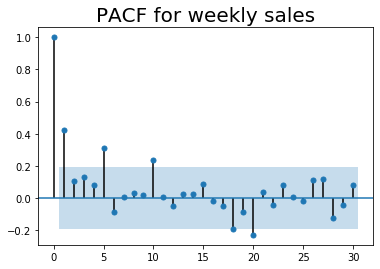

In [42]:
plot_pacf(df, lags=30, alpha=0.05, method='ols')
plt.title("PACF for weekly sales", size=20)
plt.show()

The PACF graph shows that either past 1, 5 or 10 values affect the present ones. A good starting point for the AR parameter of the model (p) may be 1 but I'd try also 5 and maybe 10.

Now I will look at the ACF plot which tells how many MA terms are required to remove any autocorrelation in the stationarized series.

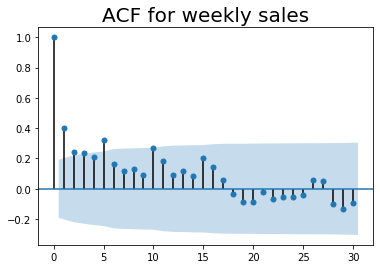

In [43]:
acf = plot_acf(df, lags=30, alpha=0.05)
plt.title("ACF for weekly sales", size=20)
plt.show()

So, the MA term (q) should be probably set to 1, maybe I'll also try 2.

### KPSS Test

The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.<br>

Here, the null hypothesis is that the series is stationary.<br>

That is, if p-value is < signif level (say 0.05), then the series is non-stationary and vice versa.

In [44]:
stats, p, lags, critical_values = kpss(df, 'ct')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning:

p-value is greater than the indicated p-value



In [45]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'#lags: {lags}')
print(f'Critical Values: {critical_values}')

if p < 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

Test Statistics: 0.1160879006149
p-value: 0.1
#lags: 13
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


The output of the KPSS test contains 4 things:

* The KPSS statistic<br>
* p-value<br>
* Number of lags used by the test<br>
* Critical values<br>

The KPSS statistic is the actual test statistic that is computed while performing the test.

The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value. That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value - this is not the case. Here, the series is stationary, however, the test statistic is only slightly smaller than the critical value for 10%, so, the outcome is not very certain, in my opinion. There is still a chance that the series is not stationary. I will now use Dickey-Fuller (ADF) Test.

### ADF Test

The difference here is the Null hypothesis which is just opposite of KPSS.

The null hypothesis of the ADF test is the presence of unit root, that is, the series is non-stationary.

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [48]:
adfuller_test(df.items_sold)

ADF Test Statistic : -2.2984917858890315
p-value : 0.17245486199799054
#Lags Used : 4
Number of Observations Used : 99
Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary 


KPSS and ADF tests contradict each other. I'd look at autocorellation plots, to get more evidence.

### Additional prove of a neccessity of differencing

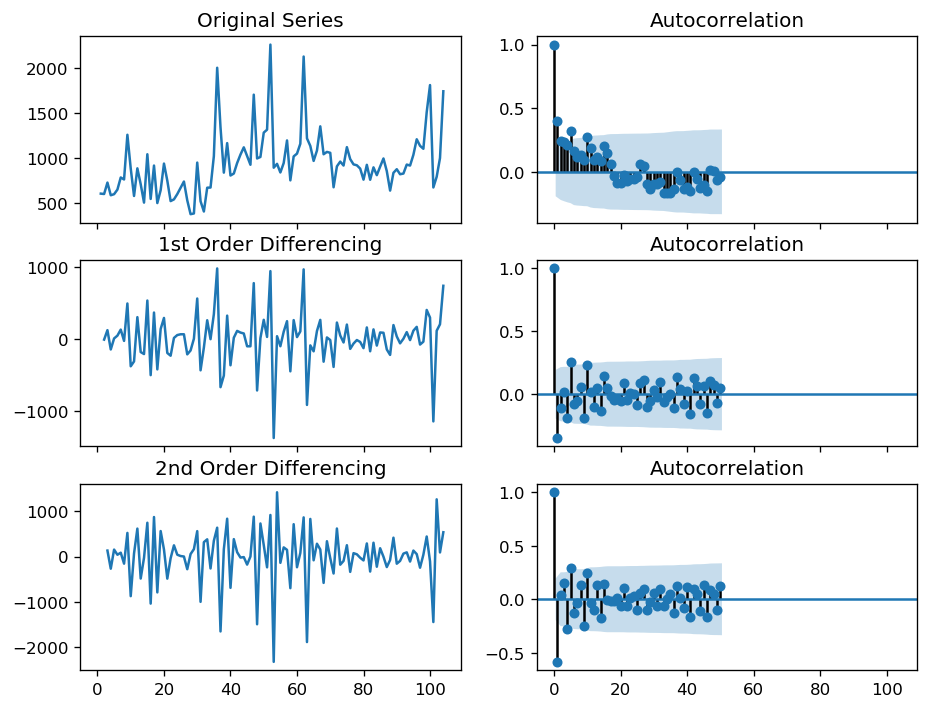

In [49]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(df.items_sold); axes[0, 0].set_title('Original Series')
plot_acf(df.items_sold, ax=axes[0, 1], lags=50)

# 1st Differencing
axes[1, 0].plot(df.items_sold.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.items_sold.diff().dropna(), ax=axes[1, 1], lags=50)

# 2nd Differencing
axes[2, 0].plot(df.items_sold.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.items_sold.diff().diff().dropna(), ax=axes[2, 1], lags=50)

plt.show()

Looking at the autocorrelation plots, I see that the lag goes into the far negative zone fairly quick already after the first differencing, which suggests that the series might have been over differenced. So, I am going to leave the series without differencing (d=0) even though it is not perfectly stationary (weak stationarity).

## ARIMA

### The concept

ARIMA (AutoRegressive Integrated Moving Average) is a class of models used to forecast a time series using the series past values alone. It captures a suite of different standard temporal structures in time series data. The key hyperparameters are:

* AR (p): Autoregression. Reflects the number of lag observations included and uses the correlation between the series and its lag, after excluding the contributions from the intermediate lags
* I (d): Integrated. The number of differencing required to make the time series stationary
* MA (q): Moving Average. Sets the size of the moving average window and uses the dependency between an observation and the error of the lagged (moving) forecast

To find values of p & q for ARIMA, I need to take help of ACF (Auto Correlation Function) & PACF (Partial Auto Correlation Function) graphs which I have plotted above.

From PACF, I am getting p = 1, 5, or 10; from ACF, I am getting q = 1 or 2.

### Fitting the model

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model = ARIMA(df.items_sold, order=(5,0,2))
results_ARIMA = model.fit(disp=-1)
#print(model_fit.summary())

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [52]:
predictions = results_ARIMA.predict()

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

Test RMSE: 290.877


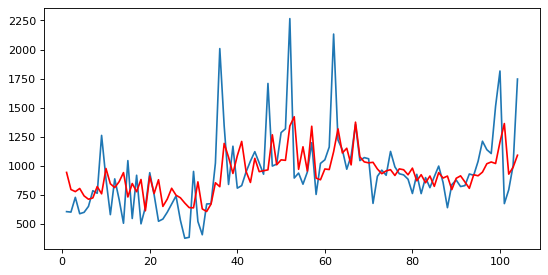

In [54]:
# Actual vs Fitted

rmse = sqrt(mean_squared_error(df.items_sold, predictions))
print('Test RMSE: %.3f' % rmse)

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':80})
plt.plot(df.items_sold)
plt.plot(predictions, color='red')
plt.show()

Historical data are modeled in general well. However, there are some important flaws visible:

* The forecast seems to be shifted one week to the right
* Peaks are not captured: they are too extreme for the autoregression

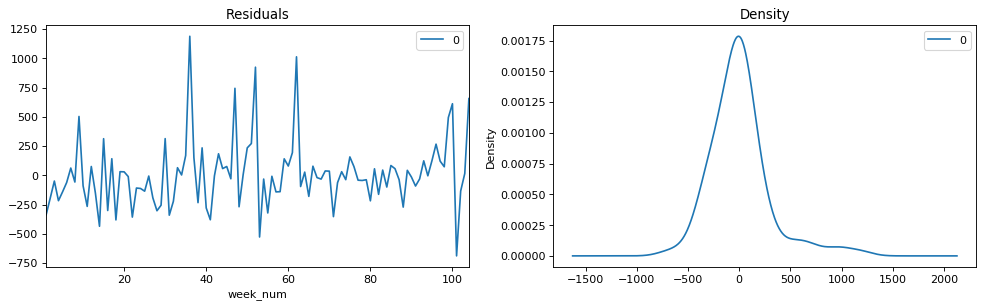

                 0
count   104.000000
mean      6.155856
std     292.219886
min    -688.929994
25%    -144.477040
50%     -12.872357
75%      78.068958
max    1188.347055


In [55]:
from pandas import DataFrame

plt.rcParams.update({'figure.figsize':(15,4), 'figure.dpi':80})

residuals = DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# summary stats of residuals
print(residuals.describe())

The density plot of the residual error values is suggesting the errors are Gaussian, however, they are not centered exactly at zero and their distribution is somewhat right-skewed, so there might be some bias in the prediction.

### Rolling forecast

In [56]:
df_test = test_data.groupby(['week_num']).agg({'items_sold':'sum'})
df_test = df_test['items_sold'].astype(float)

In [57]:
y = df_test.values

In [58]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':80})

In [59]:
def arima_predict(traindata, testdata, order=(5,0,1)):

    history = [x for x in traindata.items_sold]
    predictions = list()
    
    # walk-forward validation
    for t in range(len(testdata)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = testdata[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(testdata, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(testdata)
    plt.plot(predictions, color='red')
    plt.show()

    # Showing a table with summarized results for Jan and Feb 2020: 
    y_hat_jan = predictions[0:5]
    y_hat_feb = predictions[5:9]
    y_hat_jan_sum = np.round(sum(y_hat_jan), 0)
    y_hat_feb_sum = np.round(sum(y_hat_feb), 0)
    y_hat_total_sum = np.round((y_hat_jan_sum + y_hat_feb_sum), 0)

    y_jan = testdata[0:5]
    y_feb = testdata[5:9]
    y_jan_sum = sum(y_jan)
    y_feb_sum = sum(y_feb)
    y_total_sum = (y_jan_sum + y_feb_sum)

    comparison = [
        ['January 2020', y_hat_jan_sum, y_jan_sum, np.round((y_hat_jan_sum - y_jan_sum), 0), (np.round((y_hat_jan_sum - y_jan_sum) / y_jan_sum * 100, 1))], 
        ['February 2020', y_hat_feb_sum, y_feb_sum, np.round((y_hat_feb_sum - y_feb_sum), 0), (np.round((y_hat_feb_sum - y_feb_sum) / y_feb_sum * 100, 1))], 
        ['Jan+Feb 2020', y_hat_total_sum, y_total_sum, np.round((y_hat_total_sum - y_total_sum), 0), (np.round((y_hat_total_sum - y_total_sum) / y_total_sum * 100, 1))]
    ]
    table = pd.DataFrame(comparison, columns = ['Period', 'Predicted', 'True', 'Diff', 'Diff, %'])
    table['Predicted'] = table['Predicted'].str[0]
    table['Diff'] = table['Diff'].str[0]
    table['Diff, %'] = table['Diff, %'].str[0]
    display(table)

predicted=1168.336198, expected=362.000000
predicted=965.785723, expected=677.000000
predicted=889.262109, expected=578.000000
predicted=809.009461, expected=832.000000
predicted=828.623441, expected=1053.000000
predicted=892.463830, expected=972.000000
predicted=913.815008, expected=1260.000000
predicted=996.872320, expected=1077.000000
predicted=1007.039101, expected=983.000000
Test RMSE: 335.741


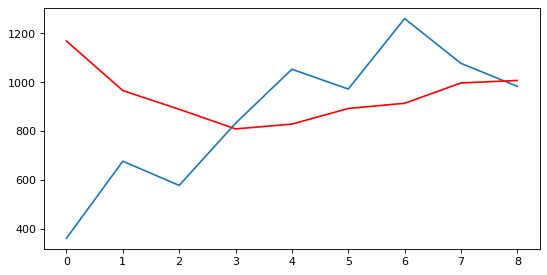

,Period,Predicted,True,Diff,"Diff, %"
0,January 2020,4661.0,3502.0,1159.0,33.1
1,February 2020,3810.0,4292.0,-482.0,-11.2
2,Jan+Feb 2020,8471.0,7794.0,677.0,8.7


In [60]:
arima_predict(df, y, order=(1,0,1))

As already noticed when looking at predictions of train data points, each prediction is heavily influenced by the previous observation which leads for example to a huge discrepancy for test week 0, directly after abundant sales in the last week 2019. The prediction for January is by no means satisfactory; the prediction for February is a bit better but underestimates sales by 11%. All in all, the forecast by ARIMA looks way too unreliable: either I couldn't fit it properly (although I tried different parameter combinations) or ARIMA is just badly suited for such type of data with much fluctuation and some extreme peaks.  

## XGBoost

### The concept

XGBoost (Extreme Gradient Boosting) is an implementation of gradient boosting algorithm for classification and regression problems as well as for time series forecasting. It is an ensemble of decision trees algorithm where new trees fix errors of those trees that are already part of the model.

XGBoost can work with multivariate input. The following variables were used:

* Time related variables: month, sequential number of the month, sequential number of the week, straight week number
* Variables related to discounts and promotions (promo - yes or no, a special promo - yes or no, discount in %% of the item price, promo time in days) – average values were calculated for each week
* For year (categorical), dummies (0, 1) were created
* A feature "holiday week" was added, to mark weeks which included some holiday
* Variables were added reflecting sales at t-1, t-2, and t-3 periods

Weren’t used for now: shop_id, brand_id

### Transforming data

This dataset will be used for fitting the model

In [61]:
xgb_total = sales.copy()

In [62]:
# Dropping excessive variables
xgb_total = xgb_total.drop(['date', 'item_id', 'item_price', 'discamount'], 1)

# Converting some variables to numeric
cols = ['promo', 'spec_promo', 'week']
xgb_total[cols] = xgb_total[cols].apply(pd.to_numeric, errors='coerce')

XGBoost is capable of multivariate modelling, so it makes sense to include some variables which I couldn't use in ARIMA - factors like price, promotion, discount, holidays.

In [63]:
xgb_sales_total = xgb_total.copy()

In [64]:
# Calculating total weekly sales
xgb_sales_total['weekly_sales'] = xgb_sales_total.groupby(['week_num']).items_sold.transform('sum')

In [65]:
# Calulating weekly averages for promo, special promo, discount size, promo time
xgb_sales_total['promo_av'] = xgb_sales_total.groupby(['week_num']).promo.transform('mean')
xgb_sales_total['size_disc_av'] = xgb_sales_total.groupby(['week_num']).size_disc.transform('mean')
xgb_sales_total['promo_time_av'] = xgb_sales_total.groupby(['week_num']).promo_time.transform('mean')
xgb_sales_total['spec_promo_av'] = xgb_sales_total.groupby(['week_num']).spec_promo.transform('mean')

In [66]:
# Leaving only unique total weekly sales
xgb_sales_total = xgb_sales_total.drop_duplicates(subset = ["week_num"])

# Dropping columns which won't be needed
xgb_sales_total = xgb_sales_total.drop(['items_sold', 'promo', 'size_disc', 'promo_time', 'spec_promo', 'shop_id', 'brand_id'], 1)

In [67]:
xgb_sales_total.rename(columns={'weekly_sales': 'items_sold'}, inplace=True)
xgb_sales_total['week'] = xgb_sales_total['week'].astype(int)

In [68]:
# Creating dummies for each year's value
#years = pd.get_dummies(xgb_sales_total.year, prefix='year')
#xgb_sales_total = pd.concat([xgb_sales_total, years], axis=1)
#xgb_sales_total = xgb_sales_total.drop(['year', 'year_2020'], 1)

# Interestingly, this didn't work - the prediction with 'year' in the initial format is better!

In [69]:
# holiday weeks: week_num = 09, 36, 47, 52, 62, 100, 104
# Marking every holiday week with "1" in the new variable "holid_week" 
xgb_sales_total['holid_week'] = 0
xgb_sales_total.loc[xgb_sales_total['week_num'].isin([9, 36, 47, 52, 62, 100, 104]), 'holid_week'] = 1

In [70]:
# Adding columns with weekly sales from the past t-3, t-2, and t-1 weeks
xgb_sales_total['items_sold_t-1'] = xgb_sales_total['items_sold'].shift(1)
xgb_sales_total['items_sold_t-2'] = xgb_sales_total['items_sold'].shift(2)
xgb_sales_total['items_sold_t-3'] = xgb_sales_total['items_sold'].shift(3)
xgb_sales_total.dropna(inplace=True)

# Re-ordering columns
#xgb_sales_total = xgb_sales_total[['year_2018', 'year_2019', 'month', 'month_num', 'week', 'week_num', 'holid_week', 'promo_av', 'size_disc_av', 'promo_time_av', 'spec_promo_av', 'items_sold_t-3', 'items_sold_t-2', 'items_sold_t-1', 'items_sold']]
xgb_sales_total = xgb_sales_total[['year', 'month', 'month_num', 'week', 'week_num', 'holid_week', 'promo_av', 'size_disc_av', 'promo_time_av', 'spec_promo_av', 'items_sold_t-3', 'items_sold_t-2', 'items_sold_t-1', 'items_sold']]

In [71]:
# Separating train and test datasets, based on week number 
xgb_train = xgb_sales_total.loc[xgb_sales_total['week_num'] < 105]
xgb_test = xgb_sales_total.loc[xgb_sales_total['week_num'].between(105, 113)]

In [72]:
#xgb_train

In [73]:
#numerical = xgb_train[['promo_av', 'size_disc_av', 'promo_time_av', 'spec_promo_av']]
#numerical.describe()

In [74]:
numerical.corr()

,month,year,month_num,week_num,items_sold,item_price,discamount
month,1.000000,-0.363780,0.105423,0.098391,0.085429,0.076232,0.261052
year,-0.363780,1.000000,0.887944,0.890447,-0.226067,0.022139,0.056416
month_num,0.105423,0.887944,1.000000,0.999200,-0.199160,0.061277,0.189131
week_num,0.098391,0.890447,0.999200,1.000000,-0.198561,0.061274,0.191787
items_sold,0.085429,-0.226067,-0.199160,-0.198561,1.000000,-0.029510,0.000603
item_price,0.076232,0.022139,0.061277,0.061274,-0.029510,1.000000,0.521733
discamount,0.261052,0.056416,0.189131,0.191787,0.000603,0.521733,1.000000


'promo_av' and 'size_disc_av' correlate almost perfectly - I could drop one of them and I have tried it but the prediction for 2020 is getting worse in this case, so I will leave them both in the model.

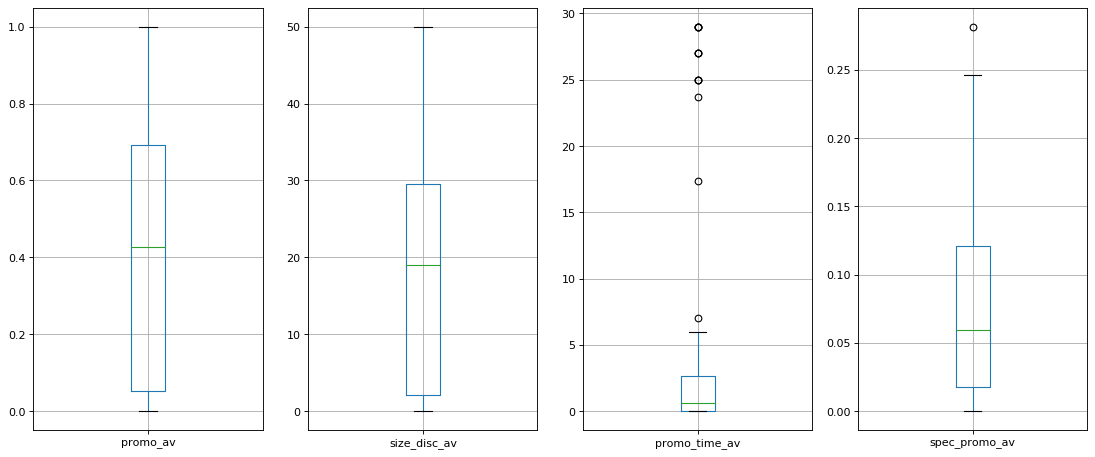

In [75]:
fig, axes = plt.subplots(1, 4)
df = xgb_train[['promo_av', 'size_disc_av', 'promo_time_av', 'spec_promo_av']]

for i, el in enumerate(list(df.columns.values)):
    a = df.boxplot(el, ax=axes.flatten()[i])

fig.set_size_inches(17, 7)
plt.show()

### Fitting the model

This model will be used for fitting and prediction:

In [76]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [77]:
model = xgb.XGBRegressor(objective='reg:squarederror', min_child_weight=10, booster='gbtree', colsample_bytree=0.2, learning_rate=0.2,
                max_depth=4, alpha=10, n_estimators=400)

How well does it fit the training dataset?

In [78]:
# Separating X from y for train and test datasets
X_train, y_train, X_test, y_test = xgb_train.iloc[:, :-1], xgb_train.iloc[:, -1], xgb_test.iloc[:, :-1], xgb_test.iloc[:, -1]

In [79]:
# Fitting the model (using early stopping, to prevent overfitting)
model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Test RMSE: 176.250


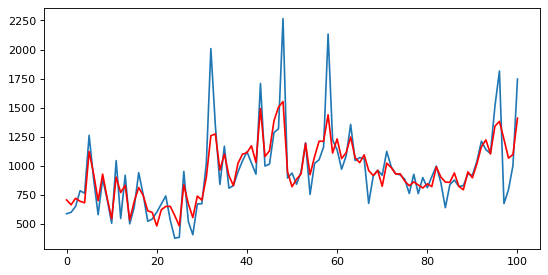

In [80]:
yhat = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, yhat))
print('Test RMSE: %.3f' % rmse)

plt.plot(y_train.reset_index(drop=True))
plt.plot(yhat, color='red')
plt.show()

The model looks overfitted, however, the peaks and other sections are not reproduced as exactly as it happens when I turn off the early_stopping_rounds parameter.

Now I will use this model to predict values for the first 9 weeks 2020.

### Rolling forecast

In [81]:
from numpy import asarray

In [82]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # split into input and output columns
    trainX, trainy = train.iloc[:, :-1], train.iloc[:, -1]
    # fit model
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]    

In [83]:
def xgb_walk_forward_validation(train, test):

    # seed history with training dataset
    history = train
    predictions = list()
    
    # walk-forward validation
    for i in range(len(test)):
        # split test rows into input and output columns
        testX, testy = test.iloc[i, :-1], test.iloc[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test.iloc[i])
        # summarize progress
        print('predicted=%f, expected=%f' % (yhat, testy))
    
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test.iloc[:, -1], predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes    
    plt.plot(test.iloc[:, -1].reset_index(drop=True))
    plt.plot(predictions, color='red')
    plt.show()
    
    # Showing a table with summarized results for Jan and Feb 2020: 
    y_hat_jan = predictions[0:5]
    y_hat_feb = predictions[5:9]
    y_hat_jan_sum = np.round(sum(y_hat_jan), 0)
    y_hat_feb_sum = np.round(sum(y_hat_feb), 0)
    y_hat_total_sum = np.round((y_hat_jan_sum + y_hat_feb_sum), 0)

    y_jan = test.iloc[0:5, -1]
    y_feb = test.iloc[5:9, -1]
    y_jan_sum = sum(y_jan)
    y_feb_sum = sum(y_feb)
    y_total_sum = (y_jan_sum + y_feb_sum)

    comparison = [
        ['January 2020', y_hat_jan_sum, y_jan_sum, np.round((y_hat_jan_sum - y_jan_sum), 0), (np.round((y_hat_jan_sum - y_jan_sum) / y_jan_sum * 100, 1))], 
        ['February 2020', y_hat_feb_sum, y_feb_sum, np.round((y_hat_feb_sum - y_feb_sum), 0), (np.round((y_hat_feb_sum - y_feb_sum) / y_feb_sum * 100, 1))], 
        ['Jan+Feb 2020', y_hat_total_sum, y_total_sum, np.round((y_hat_total_sum - y_total_sum), 0), (np.round((y_hat_total_sum - y_total_sum) / y_total_sum * 100, 1))]
    ]
    table = pd.DataFrame(comparison, columns = ['Period', 'Predicted', 'True', 'Diff', 'Diff, %'])
    display(table)

predicted=628.323669, expected=362.000000
predicted=590.864502, expected=677.000000
predicted=491.308380, expected=578.000000
predicted=881.701294, expected=832.000000
predicted=979.447632, expected=1053.000000
predicted=891.862915, expected=972.000000
predicted=1125.946045, expected=1260.000000
predicted=812.401978, expected=1077.000000
predicted=1008.437134, expected=983.000000
Test RMSE: 144.835


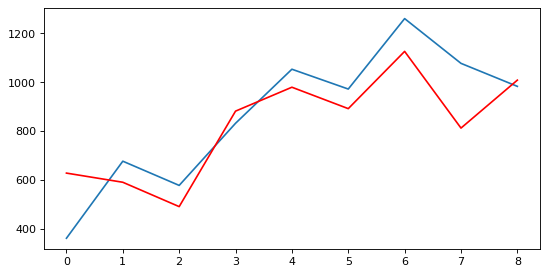

,Period,Predicted,True,Diff,"Diff, %"
0,January 2020,3572.0,3502,70.0,2.0
1,February 2020,3839.0,4292,-453.0,-10.6
2,Jan+Feb 2020,7411.0,7794,-383.0,-4.9


In [84]:
xgb_walk_forward_validation(xgb_train, xgb_test)

If I look at weekly predictions, they are not always satisfying: the discrepancy is especially big for weeks 0 and 7.

Monthly predictions are somewhat better although the forecast for February is more than 10% lower than true sales which I would consider quite a significant deviation in a real business case. The sales grew by almost 800 units in February but the algorithm is predicting growth by only 267 units which I'd say is too far from truth.

The total predicted sales for January and February are about 5% different from true sales. Some more fine-tuning of the XGBoost model could surely improve the result.

Additionally, XGBoost can return feature importance. (Importance_type "weight" - the number of times a feature is used to split the data across all trees)

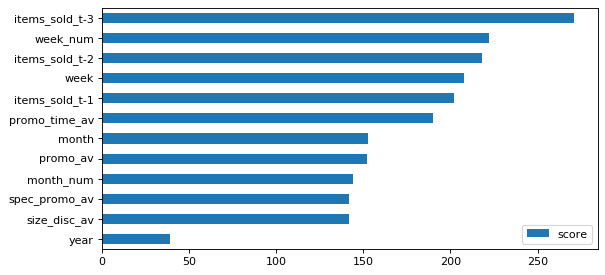

In [85]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')

'year' is seemingly much less important than other features, however, deleting it from the model leads to worse prediction, especially for January, so I prefer to keep it.

## Conclusion

### Comparison of performance of ARIMA and XGBoost

* ARIMA: one-step "shift" in the predictions, cannot account for holidays, maybe wants less noisy time series.
* XGBoost: no "shift" in the predictions, accommodates more factors, endless adjusting possibilities, has tendency to overfitting.

On this particular dataset, XGBoost showed a much better prediction accuracy than ARIMA. However, both models can be used for solving similar tasks if properly fitted. ARIMA should be effective on series without strong distortions, XGBoost can theoretically model such distortions to some extent and is generally more flexible if multiple parameters should be accounted for.

### Limitations and possible further steps

* My code is often ugly and can be revised.

* I did not account (yet) for different stores and brands; their combinations could produce several different time series which could be individually modelled by ARIMA and XGBoost and eventually pulled into a single model giving - hopefully - a more accurate overall prediction than the time series embracing sales of all brands in all stores together.

* XGBoost has very many parameters to tune; I have played with them manually a bit but maybe some other combination (obtained for example through Grid Search) could bring better results.

* Maybe modelling by months and not weeks would bring better results, especially for ARIMA (questionable but worth trying).

* More careful feature engineering should help XGBoost get better.

* Some other methods can deal with such tasks very well and could be tried out, for example LSTM or Prophet.